<a href="https://colab.research.google.com/github/YuriySamorodov/MIPT/blob/main/%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80%202/Deep%20Learning/Deep_Learning_HW2_Yuriy_Samorodov_Ensemble_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –†–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–µ –±—É–∫–≤ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ –∞–ª—Ñ–∞–≤–∏—Ç–∞

–≠—Ç–æ—Ç notebook —Å–æ–¥–µ—Ä–∂–∏—Ç —Ä–µ—à–µ–Ω–∏–µ –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –±—É–∫–≤ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ –∞–ª—Ñ–∞–≤–∏—Ç–∞ –Ω–∞ –∏—Å–∫–∞–∂–µ–Ω–Ω—ã—Ö –∏ –∑–∞—à—É–º–ª–µ–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è—Ö —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π (CNN).

## –û–ø–∏—Å–∞–Ω–∏–µ –∑–∞–¥–∞—á–∏
- **–¶–µ–ª—å**: –ö–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å 26 –∞–Ω–≥–ª–∏–π—Å–∫–∏—Ö –±—É–∫–≤ (A-Z) –Ω–∞ –∑–∞—à—É–º–ª–µ–Ω–Ω—ã—Ö RGB –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è—Ö 48x48
- **–û–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ**: 20,000 —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
- **–¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ**: 50,000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
- **–¶–µ–ª–µ–≤–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å**: ‚â• 0.82
- **–ö–ª–∞—Å—Å—ã**: 0=A, 1=B, ..., 25=Z

In [ ]:
%cd /kaggle/input/mipt-dl-captcha-2025/mds-misis-dl-captchan

/kaggle/input/mipt-dl-captcha-2025/mds-misis-dl-captchan


In [ ]:
# –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è –≥–ª—É–±–æ–∫–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-06-08 01:55:41.591350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749347741.765749      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749347741.816435      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
print(f"–í–µ—Ä—Å–∏—è TensorFlow: {tf.__version__}")
print(f"GPU –¥–æ—Å—Ç—É–ø–Ω–æ: {tf.config.list_physical_devices('GPU')}")

–í–µ—Ä—Å–∏—è TensorFlow: 2.18.0
GPU –¥–æ—Å—Ç—É–ø–Ω–æ: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ —Å–ª—É—á–∞–π–Ω—ã—Ö —Å–∏–¥–æ–≤ –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏
np.random.seed(42)
tf.random.set_seed(42)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



## 1. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–ó–∞–≥—Ä—É–∂–∞–µ–º –æ–±—É—á–∞—é—â–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –º–µ—Ç–∫–∏, –∏—Å—Å–ª–µ–¥—É–µ–º –∏—Ö —Å—Ç—Ä—É–∫—Ç—É—Ä—É –∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
print("–ó–∞–≥—Ä—É–∑–∫–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö...")
images = np.load('images.npy')
labels = np.load('labels.npy')

print(f"–†–∞–∑–º–µ—Ä –º–∞—Å—Å–∏–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: {images.shape}")
print(f"–†–∞–∑–º–µ—Ä –º–∞—Å—Å–∏–≤–∞ –º–µ—Ç–æ–∫: {labels.shape}")
print(f"–¢–∏–ø –¥–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: {images.dtype}")
print(f"–¢–∏–ø –¥–∞–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫: {labels.dtype}")
print(f"–î–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: [{images.min()}, {images.max()}]")
print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –º–µ—Ç–∫–∏: {np.unique(labels)}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: {len(np.unique(labels))}")

–ó–∞–≥—Ä—É–∑–∫–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö...
–†–∞–∑–º–µ—Ä –º–∞—Å—Å–∏–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: (20000, 48, 48, 3)
–†–∞–∑–º–µ—Ä –º–∞—Å—Å–∏–≤–∞ –º–µ—Ç–æ–∫: (20000,)
–¢–∏–ø –¥–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: uint8
–¢–∏–ø –¥–∞–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫: int64
–î–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: [0, 255]
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –º–µ—Ç–∫–∏: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: 26


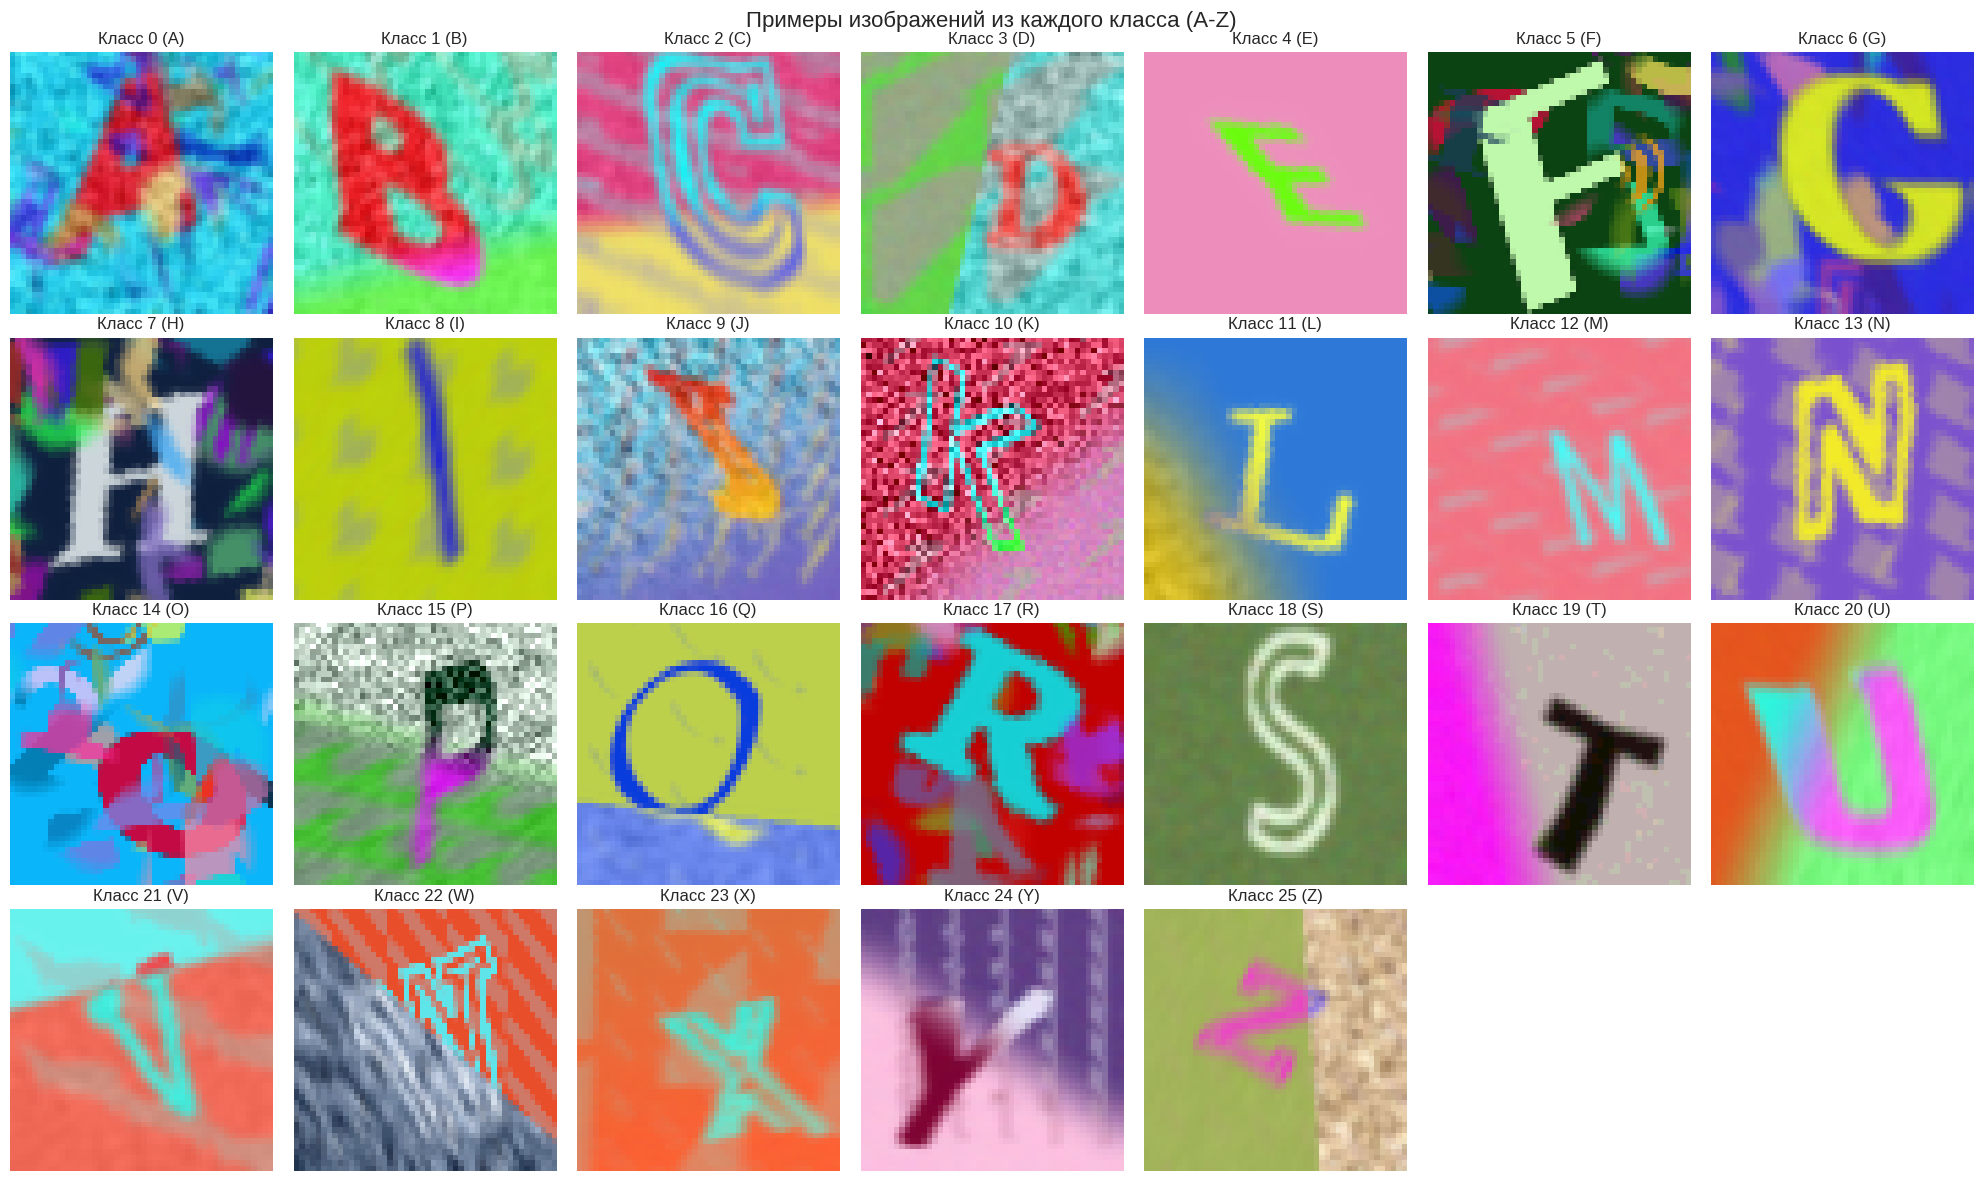

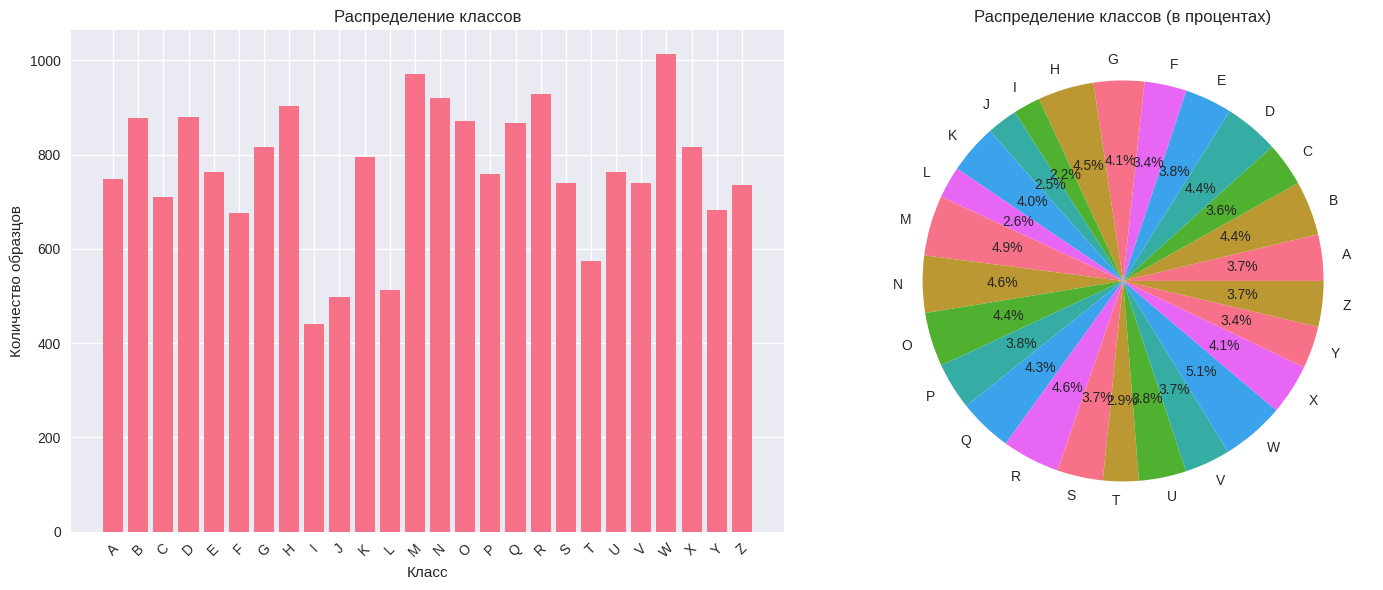


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:
–ö–ª–∞—Å—Å A: 748 –æ–±—Ä–∞–∑—Ü–æ–≤ (3.7%)
–ö–ª–∞—Å—Å B: 878 –æ–±—Ä–∞–∑—Ü–æ–≤ (4.4%)
–ö–ª–∞—Å—Å C: 710 –æ–±—Ä–∞–∑—Ü–æ–≤ (3.5%)
–ö–ª–∞—Å—Å D: 880 –æ–±—Ä–∞–∑—Ü–æ–≤ (4.4%)
–ö–ª–∞—Å—Å E: 764 –æ–±—Ä–∞–∑—Ü–æ–≤ (3.8%)
–ö–ª–∞—Å—Å F: 677 –æ–±—Ä–∞–∑—Ü–æ–≤ (3.4%)
–ö–ª–∞—Å—Å G: 816 –æ–±—Ä–∞–∑—Ü–æ–≤ (4.1%)
–ö–ª–∞—Å—Å H: 904 –æ–±—Ä–∞–∑—Ü–æ–≤ (4.5%)
–ö–ª–∞—Å—Å I: 440 –æ–±—Ä–∞–∑—Ü–æ–≤ (2.2%)
–ö–ª–∞—Å—Å J: 497 –æ–±—Ä–∞–∑—Ü–æ–≤ (2.5%)
–ö–ª–∞—Å—Å K: 794 –æ–±—Ä–∞–∑—Ü–æ–≤ (4.0%)
–ö–ª–∞—Å—Å L: 512 –æ–±—Ä–∞–∑—Ü–æ–≤ (2.6%)
–ö–ª–∞—Å—Å M: 972 –æ–±—Ä–∞–∑—Ü–æ–≤ (4.9%)
–ö–ª–∞—Å—Å N: 921 –æ–±—Ä–∞–∑—Ü–æ–≤ (4.6%)
–ö–ª–∞—Å—Å O: 871 –æ–±—Ä–∞–∑—Ü–æ–≤ (4.4%)
–ö–ª–∞—Å—Å P: 759 –æ–±—Ä–∞–∑—Ü–æ–≤ (3.8%)
–ö–ª–∞—Å—Å Q: 866 –æ–±—Ä–∞–∑—Ü–æ–≤ (4.3%)
–ö–ª–∞—Å—Å R: 929 –æ–±—Ä–∞–∑—Ü–æ–≤ (4.6%)
–ö–ª–∞—Å—Å S: 739 –æ–±—Ä–∞–∑—Ü–æ–≤ (3.7%)
–ö–ª–∞—Å—Å T: 575 –æ–±—Ä–∞–∑—Ü–æ–≤ (2.9%)
–ö–ª–∞—Å—Å U: 763 –æ–±—Ä–∞–∑—Ü–æ–≤ (3.8%)
–ö–ª–∞—Å—Å V: 739 –æ–±—Ä–∞–∑—Ü–æ–≤ (3.7%)
–ö–ª–∞—Å—Å W: 1013 –æ–±—Ä–∞–∑—Ü–

In [ ]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
fig, axes = plt.subplots(4, 7, figsize=(20, 12))
fig.suptitle('–ü—Ä–∏–º–µ—Ä—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ (A-Z)', fontsize=16)

for i in range(26):
    # –ù–∞–π—Ç–∏ –ø–µ—Ä–≤–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∫–ª–∞—Å—Å–∞ i
    class_indices = np.where(labels == i)[0]
    if len(class_indices) > 0:
        sample_image = images[class_indices[0]]
        row, col = divmod(i, 7)
        axes[row, col].imshow(sample_image)
        axes[row, col].set_title(f'–ö–ª–∞—Å—Å {i} ({chr(65+i)})', fontsize=12)
        axes[row, col].axis('off')

# –£–¥–∞–ª–µ–Ω–∏–µ –ª–∏—à–Ω–∏—Ö –ø–æ–¥–≥—Ä–∞—Ñ–∏–∫–æ–≤
for i in range(26, 28):
    row, col = divmod(i, 7)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# –ì—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤
plt.figure(figsize=(15, 6))
label_counts = np.bincount(labels)
class_names = [chr(65+i) for i in range(26)]

plt.subplot(1, 2, 1)
plt.bar(range(26), label_counts)
plt.xlabel('–ö–ª–∞—Å—Å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤')
plt.xticks(range(26), class_names)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(label_counts, labels=class_names, autopct='%1.1f%%')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ (–≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö)')

plt.tight_layout()
plt.show()

print("\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:")
for i in range(26):
    print(f"–ö–ª–∞—Å—Å {chr(65+i)}: {label_counts[i]} –æ–±—Ä–∞–∑—Ü–æ–≤ ({label_counts[i]/len(labels)*100:.1f}%)")

## 2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∏—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

In [ ]:
# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∫ –¥–∏–∞–ø–∞–∑–æ–Ω—É [0, 1]
X = images.astype('float32') / 255.0
y = to_categorical(labels, num_classes=26)

print(f"–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: {X.shape}")
print(f"–†–∞–∑–º–µ—Ä one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫: {y.shape}")
print(f"–î–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ—Å–ª–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏: [{X.min()}, {X.max()}]")

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=labels
)

print(f"\n–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞: {X_train.shape[0]} –æ–±—Ä–∞–∑—Ü–æ–≤")
print(f"–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞: {X_val.shape[0]} –æ–±—Ä–∞–∑—Ü–æ–≤")

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,  # –ë—É–∫–≤—ã –Ω–µ –¥–æ–ª–∂–Ω—ã –æ—Ç—Ä–∞–∂–∞—Ç—å—Å—è –ø–æ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–∏
    fill_mode='nearest'
)

print("\n–ù–∞—Å—Ç—Ä–æ–µ–Ω–∞ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö:")
print("- –ü–æ–≤–æ—Ä–æ—Ç: ¬±15 –≥—Ä–∞–¥—É—Å–æ–≤")
print("- –°–¥–≤–∏–≥ –ø–æ —à–∏—Ä–∏–Ω–µ/–≤—ã—Å–æ—Ç–µ: ¬±10%")
print("- –°–¥–≤–∏–≥: ¬±10%")
print("- –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ: ¬±10%")

–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: (20000, 48, 48, 3)
–†–∞–∑–º–µ—Ä one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫: (20000, 26)
–î–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ—Å–ª–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏: [0.0, 1.0]

–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞: 16000 –æ–±—Ä–∞–∑—Ü–æ–≤
–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞: 4000 –æ–±—Ä–∞–∑—Ü–æ–≤

–ù–∞—Å—Ç—Ä–æ–µ–Ω–∞ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö:
- –ü–æ–≤–æ—Ä–æ—Ç: ¬±15 –≥—Ä–∞–¥—É—Å–æ–≤
- –°–¥–≤–∏–≥ –ø–æ —à–∏—Ä–∏–Ω–µ/–≤—ã—Å–æ—Ç–µ: ¬±10%
- –°–¥–≤–∏–≥: ¬±10%
- –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ: ¬±10%


## 3. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏

–û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã —Å–≤–µ—Ä—Ç–æ—á–Ω–æ–π –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ (CNN), –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –±—É–∫–≤.

In [ ]:
def create_cnn_model(input_shape=(48, 48, 3), num_classes=26):
    """
    –°–æ–∑–¥–∞–Ω–∏–µ CNN –º–æ–¥–µ–ª–∏ –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –∞–ª—Ñ–∞–≤–∏—Ç–∞
    """
    model = models.Sequential([
        # –ü–µ—Ä–≤—ã–π —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–π –±–ª–æ–∫
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # –í—Ç–æ—Ä–æ–π —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–π –±–ª–æ–∫
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # –¢—Ä–µ—Ç–∏–π —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–π –±–ª–æ–∫
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # –ß–µ—Ç–≤–µ—Ä—Ç—ã–π —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–π –±–ª–æ–∫ (–±–µ–∑ MaxPooling)
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Dropout(0.5),

        # –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –∏ –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–µ —Å–ª–æ–∏
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = create_cnn_model()

# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –º–æ–¥–µ–ª–∏
model.summary()

# –ü–æ–¥—Å—á–µ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
total_params = model.count_params()
print(f"\n–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: {total_params:,}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749347757.491511      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                      ‚îÇ (None, 48, 48, 32)          ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization                  ‚îÇ (None, 48, 48, 32)          ‚îÇ             128 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)                    ‚îÇ (None, 48, 48, 32)          ‚îÇ           9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)         ‚îÇ (None, 24, 24, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 24, 24, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)                    ‚îÇ (None, 24, 24, 64)          ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1                ‚îÇ (None, 24, 24, 64)          ‚îÇ             256 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_3 (Conv2D)                    ‚îÇ (None, 24, 24, 64)          ‚îÇ          36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)       ‚îÇ (None, 12, 12, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 1,446,842 (5.52 MB)

 Trainable params: 1,444,346 (5.51 MB)

 Non-trainable params: 2,496 (9.75 KB)


–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: 1,446,842


## 4. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

–û–±—É—á–µ–Ω–∏–µ CNN –Ω–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö —Å –∫–æ–ª–±—ç–∫–∞–º–∏ –¥–ª—è —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏ –∏ —É–º–µ–Ω—å—à–µ–Ω–∏—è —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è.

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–±—ç–∫–æ–≤
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è
BATCH_SIZE = 32
EPOCHS = 100

print(f"–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è:")
print(f"- –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞: {BATCH_SIZE}")
print(f"- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö: {EPOCHS}")
print(f"- –¢–µ—Ä–ø–µ–Ω–∏–µ —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏: 10")
print(f"- –¢–µ—Ä–ø–µ–Ω–∏–µ —É–º–µ–Ω—å—à–µ–Ω–∏—è —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è: 5")

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
print("\n–ù–∞—á–∞–ª–æ –æ–±—É—á–µ–Ω–∏—è...")
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=len(X_train) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

print("\n–û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ!")

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è:
- –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞: 32
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö: 100
- –¢–µ—Ä–ø–µ–Ω–∏–µ —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏: 10
- –¢–µ—Ä–ø–µ–Ω–∏–µ —É–º–µ–Ω—å—à–µ–Ω–∏—è —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è: 5

–ù–∞—á–∞–ª–æ –æ–±—É—á–µ–Ω–∏—è...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1749347766.435705      82 service.cc:148] XLA service 0x7bd808002160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749347766.436592      82 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749347767.250406      82 cuda_dnn.cc:529] Loaded cuDNN version 90300


  6/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 24ms/step - accuracy: 0.0405 - loss: 4.7933     

I0000 00:00:1749347774.267586      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 30ms/step - accuracy: 0.0430 - loss: 4.1857 - val_accuracy: 0.0382 - val_loss: 3.7425 - learning_rate: 0.0010
Epoch 2/100
500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 26ms/step - accuracy: 0.0443 - loss: 3.5836 - val_accuracy: 0.0413 - val_loss: 3.4367 - learning_rate: 0.0010
Epoch 3/100
500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 26ms/step - accuracy: 0.0400 - loss: 3.4310 - val_accuracy: 0.0480 - val_loss: 3.2546 - learning_rate: 0.0010
Epoch 4/100
500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 25ms/step - accuracy: 0.0424 - loss: 3.3677 - val_accuracy: 0.0450 - val_loss: 3.2633 - learning_rate: 0.0010
Epoch 5/100
500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 25ms/step - accuracy: 0.0463 - loss: 3.3184 - val_accuracy: 0.0485 - val_loss: 3.2764 - learning_rate: 0.0010
Epoch 6/100
500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

## 5. –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏

–û—Ü–µ–Ω–∫–∞ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ—Ü–µ—Å—Å–∞ –æ–±—É—á–µ–Ω–∏—è.

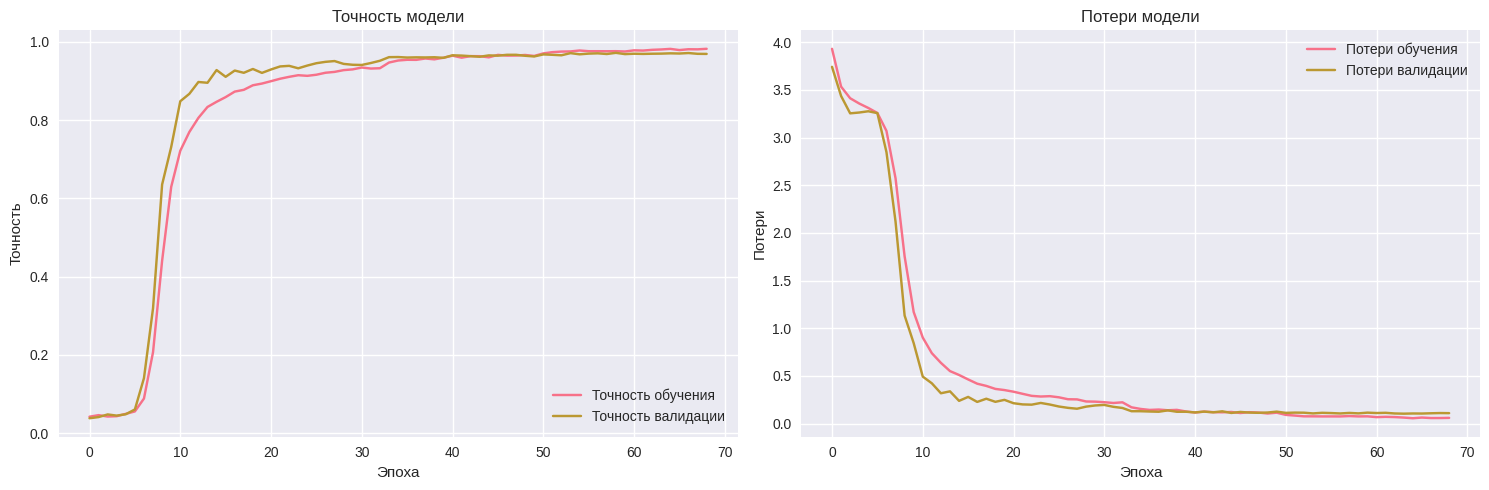


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤–∞–ª–∏–¥–∞—Ü–∏–∏:
- –ü–æ—Ç–µ—Ä–∏: 0.1079
- –¢–æ—á–Ω–æ—Å—Ç—å: 0.9720 (97.20%)
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step

–û—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
              precision    recall  f1-score   support

           A       1.00      0.98      0.99       150
           B       0.96      0.95      0.96       176
           C       0.96      0.96      0.96       142
           D       0.99      0.96      0.98       176
           E       0.95      0.94      0.94       153
           F       0.96      0.96      0.96       135
           G       0.97      0.96      0.97       163
           H       0.97      0.97      0.97       181
           I       0.94      0.90      0.92        88
           J       0.99      0.94      0.96        99
           K       0.97      0.97      0.97       159
           L       0.95      0.99      0.97       102
           M       0.98      0.98      0.98       194
           N      

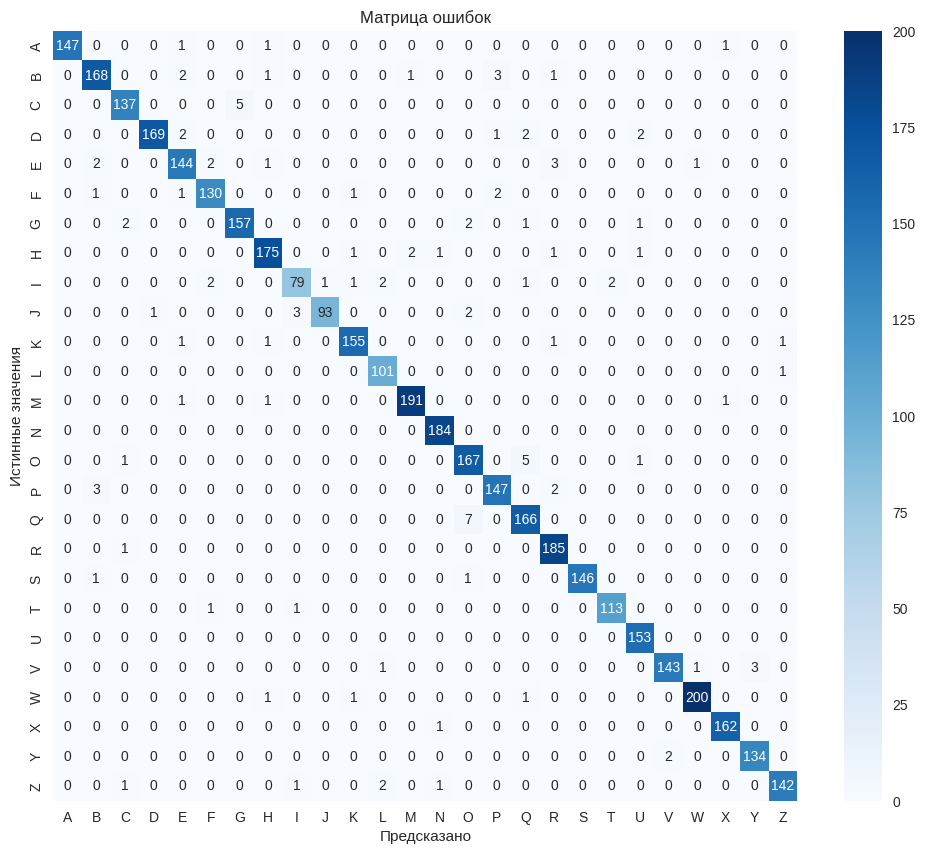

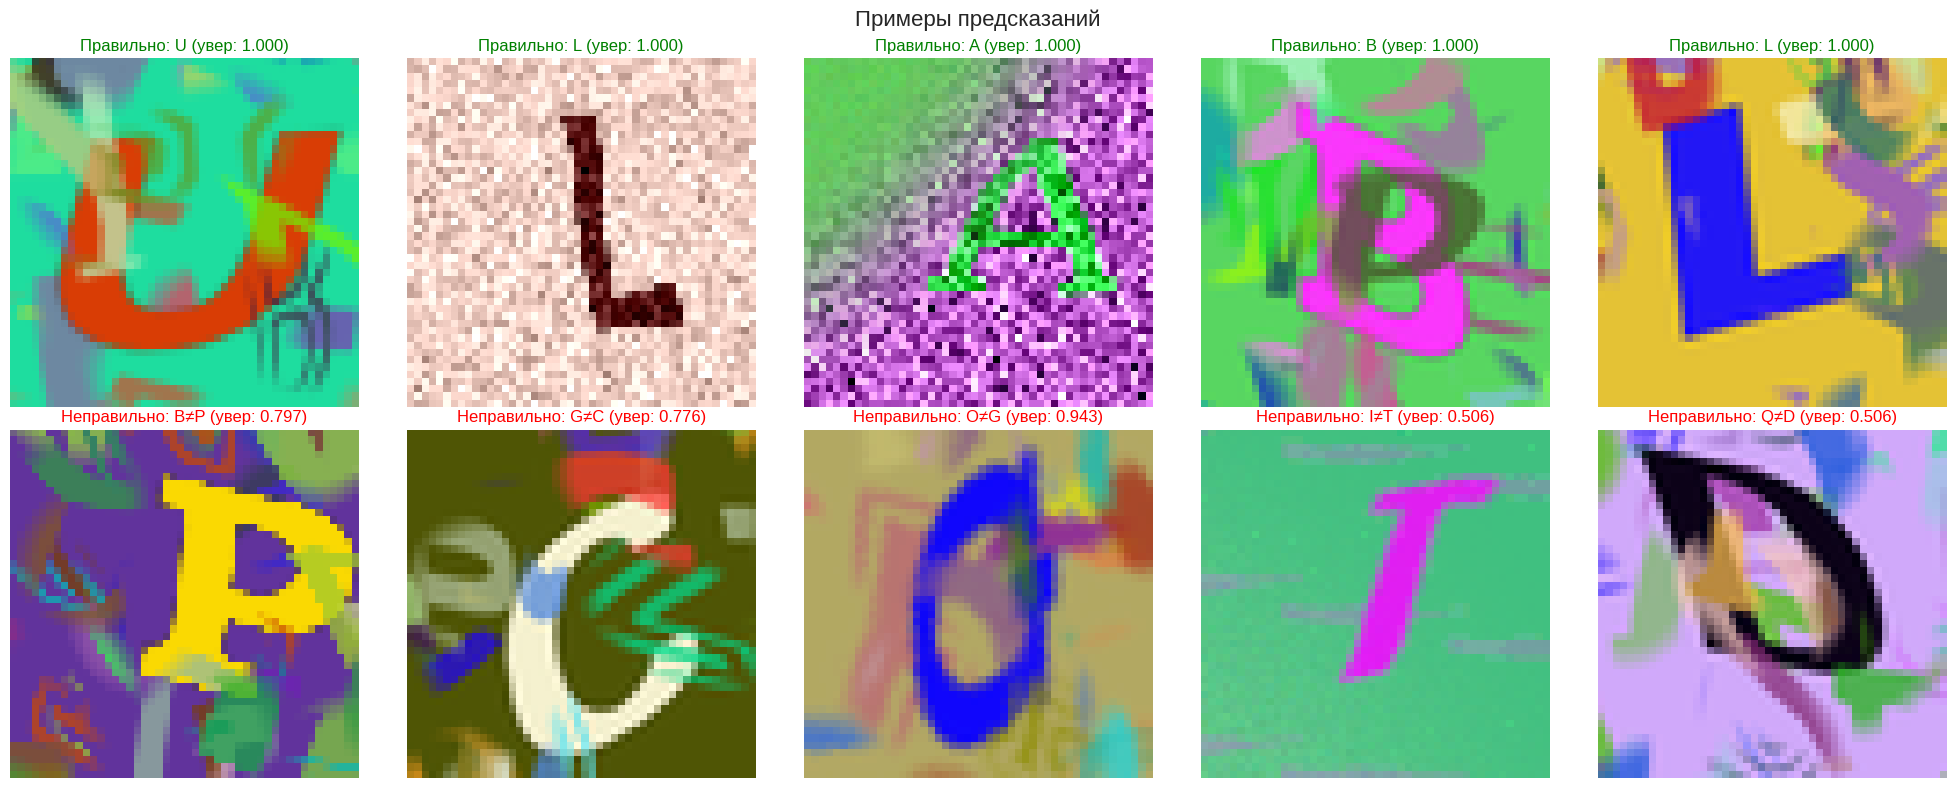

In [ ]:
# –ì—Ä–∞—Ñ–∏–∫ –∏—Å—Ç–æ—Ä–∏–∏ –æ–±—É—á–µ–Ω–∏—è
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# –ì—Ä–∞—Ñ–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
axes[0].plot(history.history['accuracy'], label='–¢–æ—á–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è')
axes[0].plot(history.history['val_accuracy'], label='–¢–æ—á–Ω–æ—Å—Ç—å –≤–∞–ª–∏–¥–∞—Ü–∏–∏')
axes[0].set_title('–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏')
axes[0].set_xlabel('–≠–ø–æ—Ö–∞')
axes[0].set_ylabel('–¢–æ—á–Ω–æ—Å—Ç—å')
axes[0].legend()
axes[0].grid(True)

# –ì—Ä–∞—Ñ–∏–∫ –ø–æ—Ç–µ—Ä—å –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏
axes[1].plot(history.history['loss'], label='–ü–æ—Ç–µ—Ä–∏ –æ–±—É—á–µ–Ω–∏—è')
axes[1].plot(history.history['val_loss'], label='–ü–æ—Ç–µ—Ä–∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏')
axes[1].set_title('–ü–æ—Ç–µ—Ä–∏ –º–æ–¥–µ–ª–∏')
axes[1].set_xlabel('–≠–ø–æ—Ö–∞')
axes[1].set_ylabel('–ü–æ—Ç–µ—Ä–∏')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# –û—Ü–µ–Ω–∫–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤–∞–ª–∏–¥–∞—Ü–∏–∏:")
print(f"- –ü–æ—Ç–µ—Ä–∏: {val_loss:.4f}")
print(f"- –¢–æ—á–Ω–æ—Å—Ç—å: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# –û—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
class_names = [chr(65+i) for i in range(26)]
print("\n–û—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫')
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.show()

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –∏ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('–ü—Ä–∏–º–µ—Ä—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π', fontsize=16)

# –ü—Ä–∞–≤–∏–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
correct_indices = np.where(y_pred_classes == y_true_classes)[0][:5]
for i, idx in enumerate(correct_indices):
    axes[0, i].imshow(X_val[idx])
    pred_letter = chr(65 + y_pred_classes[idx])
    true_letter = chr(65 + y_true_classes[idx])
    confidence = y_pred[idx].max()
    axes[0, i].set_title(f'–ü—Ä–∞–≤–∏–ª—å–Ω–æ: {true_letter} (—É–≤–µ—Ä: {confidence:.3f})', color='green')
    axes[0, i].axis('off')

# –ù–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0][:5]
for i, idx in enumerate(incorrect_indices):
    axes[1, i].imshow(X_val[idx])
    pred_letter = chr(65 + y_pred_classes[idx])
    true_letter = chr(65 + y_true_classes[idx])
    confidence = y_pred[idx].max()
    axes[1, i].set_title(f'–ù–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ: {pred_letter}‚â†{true_letter} (—É–≤–µ—Ä: {confidence:.3f})', color='red')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

## 6. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π

–ó–∞–≥—Ä—É–∑–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤.

–ó–∞–≥—Ä—É–∑–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö...
–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: (50000, 48, 48, 3)
–¢–∏–ø –¥–∞–Ω–Ω—ã—Ö —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: uint8
–î–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: [0, 255]
–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: (50000, 48, 48, 3)

–ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π...
1563/1563 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 3ms/step
–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π: (50000, 26)
–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤: (50000,)
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


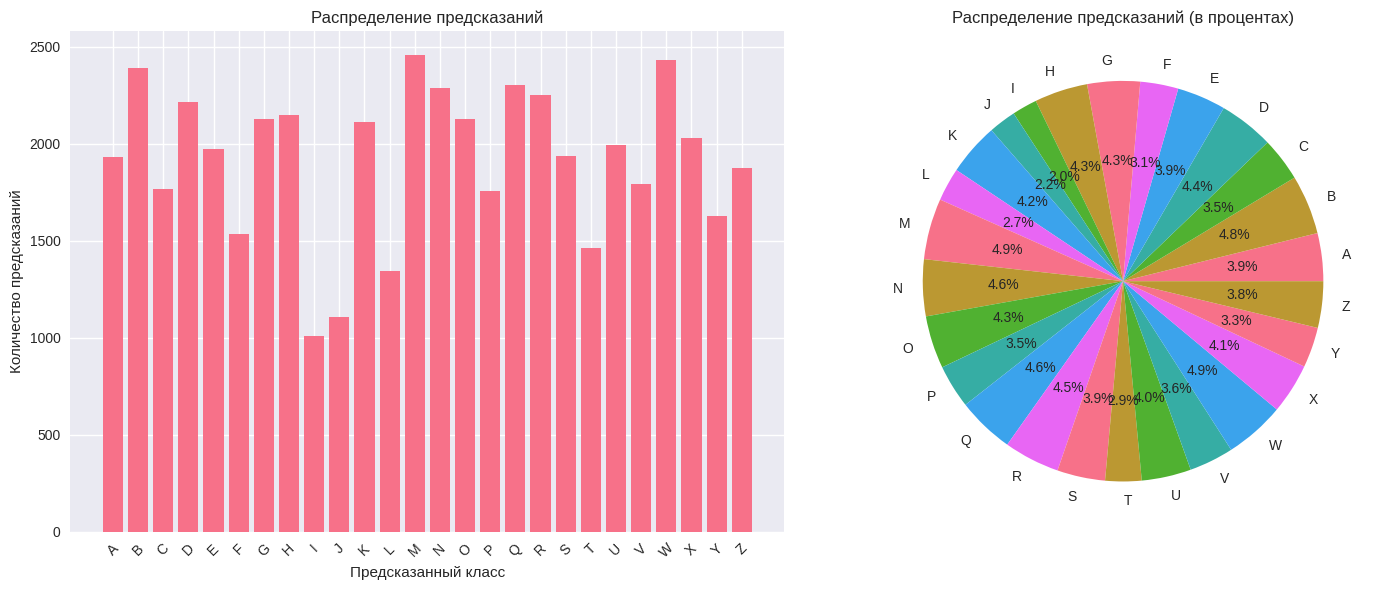


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:
–ö–ª–∞—Å—Å A: 1932 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (3.9%)
–ö–ª–∞—Å—Å B: 2392 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.8%)
–ö–ª–∞—Å—Å C: 1766 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (3.5%)
–ö–ª–∞—Å—Å D: 2217 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.4%)
–ö–ª–∞—Å—Å E: 1971 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (3.9%)
–ö–ª–∞—Å—Å F: 1536 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (3.1%)
–ö–ª–∞—Å—Å G: 2126 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.3%)
–ö–ª–∞—Å—Å H: 2149 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.3%)
–ö–ª–∞—Å—Å I: 1010 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (2.0%)
–ö–ª–∞—Å—Å J: 1107 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (2.2%)
–ö–ª–∞—Å—Å K: 2113 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.2%)
–ö–ª–∞—Å—Å L: 1343 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (2.7%)
–ö–ª–∞—Å—Å M: 2460 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.9%)
–ö–ª–∞—Å—Å N: 2287 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.6%)
–ö–ª–∞—Å—Å O: 2128 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.3%)
–ö–ª–∞—Å—Å P: 1756 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (3.5%)
–ö–ª–∞—Å—Å Q: 2301 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.6%)
–ö–ª–∞—Å—Å R: 2253 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.5%)
–ö–ª–∞—Å—Å S: 1936 –ø—Ä–µ–¥—

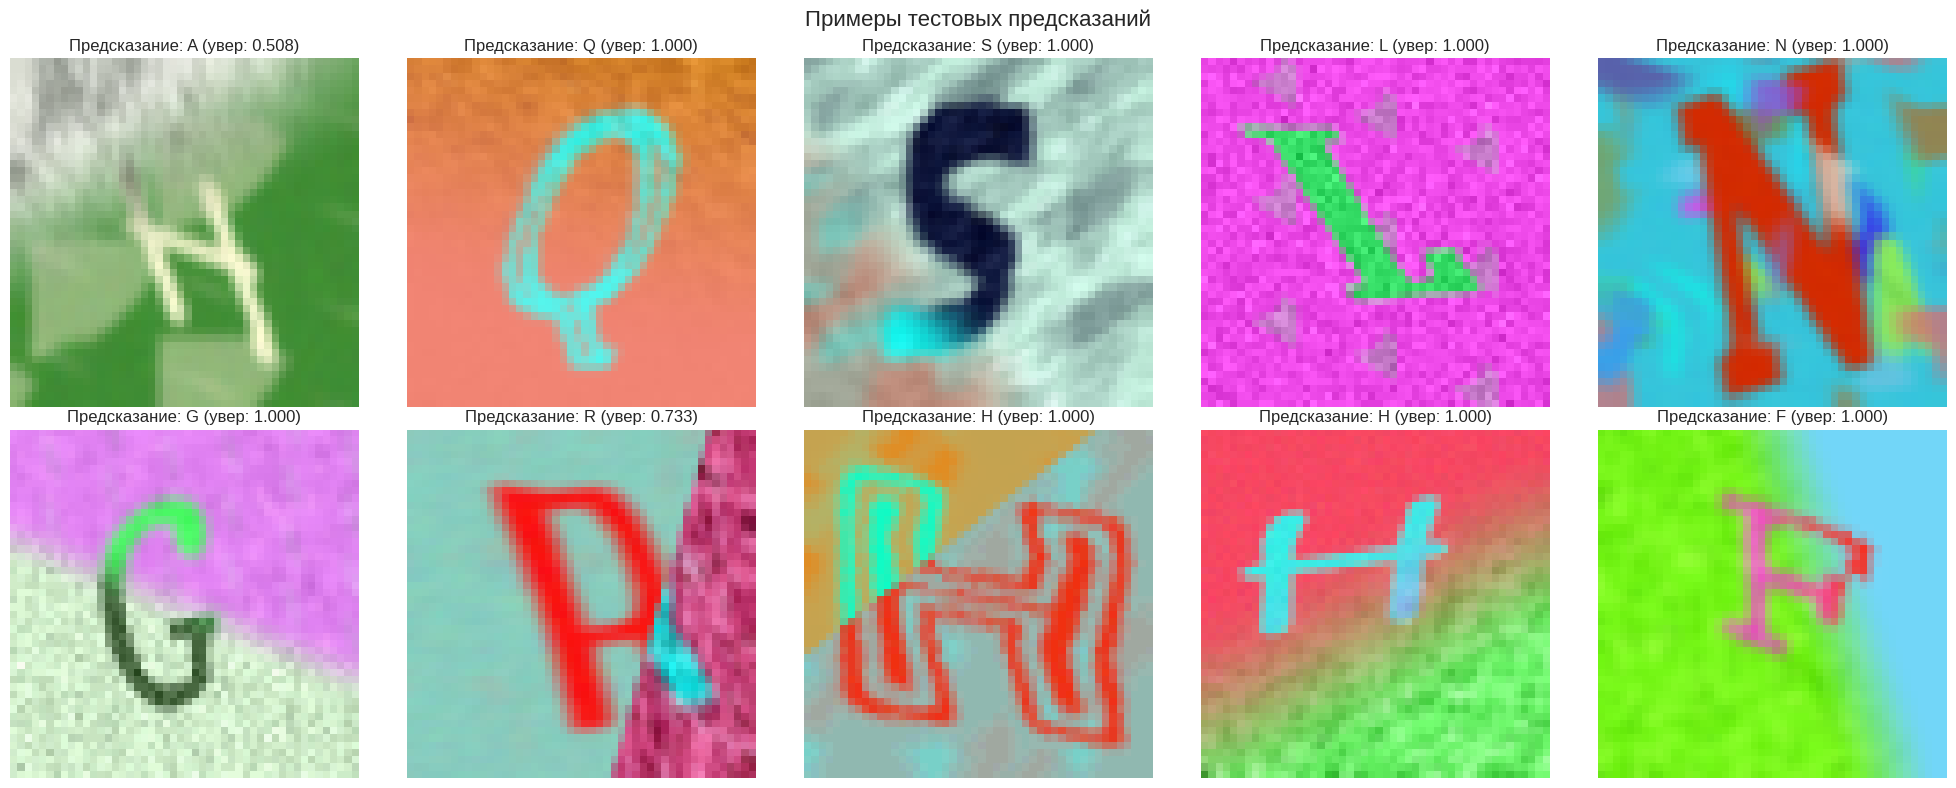

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("–ó–∞–≥—Ä—É–∑–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö...")
test_images = np.load('images_sub.npy')
print(f"–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: {test_images.shape}")
print(f"–¢–∏–ø –¥–∞–Ω–Ω—ã—Ö —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: {test_images.dtype}")
print(f"–î–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: [{test_images.min()}, {test_images.max()}]")

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π (—Ç–∞–∫ –∂–µ, –∫–∞–∫ –∏ –¥–ª—è –æ–±—É—á–∞—é—â–∏—Ö)
X_test = test_images.astype('float32') / 255.0
print(f"–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π: {X_test.shape}")

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
print("\n–ì–µ–Ω–µ—Ä–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π...")
test_predictions = model.predict(X_test, batch_size=BATCH_SIZE, verbose=1)
test_pred_classes = np.argmax(test_predictions, axis=1)

print(f"–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π: {test_predictions.shape}")
print(f"–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤: {test_pred_classes.shape}")
print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã: {np.unique(test_pred_classes)}")

# –ü–æ–∫–∞–∑–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
plt.figure(figsize=(15, 6))
pred_counts = np.bincount(test_pred_classes, minlength=26)
class_names = [chr(65+i) for i in range(26)]

plt.subplot(1, 2, 1)
plt.bar(range(26), pred_counts)
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π')
plt.xticks(range(26), class_names)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(pred_counts, labels=class_names, autopct='%1.1f%%')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (–≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö)')

plt.tight_layout()
plt.show()

print("\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π:")
for i in range(26):
    print(f"–ö–ª–∞—Å—Å {chr(65+i)}: {pred_counts[i]} –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π ({pred_counts[i]/len(test_pred_classes)*100:.1f}%)")

# –ü–æ–∫–∞–∑–∞—Ç—å –ø—Ä–∏–º–µ—Ä—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å—é
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('–ü—Ä–∏–º–µ—Ä—ã —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π', fontsize=16)

for i in range(10):
    row, col = divmod(i, 5)
    idx = np.random.randint(0, len(X_test))
    axes[row, col].imshow(X_test[idx])
    pred_letter = chr(65 + test_pred_classes[idx])
    confidence = test_predictions[idx].max()
    axes[row, col].set_title(f'–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: {pred_letter} (—É–≤–µ—Ä: {confidence:.3f})')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## 7. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏

–§–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –≤ CSV —Ñ–∞–π–ª, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π —Å—Ç—Ä—É–∫—Ç—É—Ä–µ sample_submission.csv.

In [ ]:
# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏
submission = pd.DataFrame({
    'Id': range(len(test_pred_classes)),
    'Category': test_pred_classes
})

print(f"–†–∞–∑–º–µ—Ä —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏: {submission.shape}")
print("\n–ü–µ—Ä–≤—ã–µ 10 —Å—Ç—Ä–æ–∫ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏:")
print(submission.head(10))

print("\n–ü–æ—Å–ª–µ–¥–Ω–∏–µ 10 —Å—Ç—Ä–æ–∫ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏:")
print(submission.tail(10))

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Ñ–æ—Ä–º–∞—Ç–∞ –æ–±—Ä–∞–∑—Ü—É
sample_submission = pd.read_csv('sample_submission.csv')
print(f"\n–†–∞–∑–º–µ—Ä –æ–±—Ä–∞–∑—Ü–∞ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏: {sample_submission.shape}")
print(f"–†–∞–∑–º–µ—Ä –Ω–∞—à–µ–≥–æ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏: {submission.shape}")
print(f"–°—Ç–æ–ª–±—Ü—ã —Å–æ–≤–ø–∞–¥–∞—é—Ç: {list(submission.columns) == list(sample_submission.columns)}")
print(f"–î–∏–∞–ø–∞–∑–æ–Ω Id —Å–æ–≤–ø–∞–¥–∞–µ—Ç: {submission['Id'].min()} –¥–æ {submission['Id'].max()}")
print(f"–î–∏–∞–ø–∞–∑–æ–Ω Category: {submission['Category'].min()} –¥–æ {submission['Category'].max()}")

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏
submission_filename = '/kaggle/working/submission.csv'
submission.to_csv(submission_filename, index=False)
print(f"\n–§–∞–π–ª –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω –∫–∞–∫ '{submission_filename}'")

# –ò—Ç–æ–≥–æ–≤–æ–µ —Ä–µ–∑—é–º–µ
print("\n" + "="*50)
print("–†–ï–ó–Æ–ú–ï –û–ë–£–ß–ï–ù–ò–Ø")
print("="*50)
print(f"–ò—Ç–æ–≥–æ–≤–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –≤–∞–ª–∏–¥–∞—Ü–∏–∏: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"–¶–µ–ª–µ–≤–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.82 (82%)")
print(f"–¶–µ–ª—å –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–∞: {'‚úì –î–ê' if val_accuracy >= 0.82 else '‚úó –ù–ï–¢'}")
print(f"–°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–æ —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π: {len(test_pred_classes):,}")
print(f"–§–∞–π–ª –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏: {submission_filename}")
print("="*50)

if val_accuracy >= 0.82:
    print("üéâ –ü–æ–∑–¥—Ä–∞–≤–ª—è–µ–º! –í–∞—à–∞ –º–æ–¥–µ–ª—å –¥–æ—Å—Ç–∏–≥–ª–∞ —Ü–µ–ª–µ–≤–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏!")
    print("–¢–µ–ø–µ—Ä—å –≤—ã –º–æ–∂–µ—Ç–µ –æ—Ç–ø—Ä–∞–≤–∏—Ç—å —Ñ–∞–π–ª 'submission.csv' –Ω–∞ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–µ.")
else:
    print("‚ö†Ô∏è  –¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∏–∂–µ —Ü–µ–ª–µ–≤–æ–π. –†–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ:")
    print("   - –û–±—É—á–µ–Ω–∏–µ –Ω–∞ –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö")
    print("   - –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –º–æ–¥–µ–ª–∏")
    print("   - –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤")
    print("   - –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –±–æ–ª—å—à–µ–π –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö")

–†–∞–∑–º–µ—Ä —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏: (50000, 2)

–ü–µ—Ä–≤—ã–µ 10 —Å—Ç—Ä–æ–∫ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏:
   Id  Category
0   0         5
1   1         8
2   2        14
3   3        12
4   4        10
5   5         7
6   6         5
7   7        17
8   8        23
9   9        22

–ü–æ—Å–ª–µ–¥–Ω–∏–µ 10 —Å—Ç—Ä–æ–∫ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏:
          Id  Category
49990  49990         7
49991  49991         7
49992  49992         1
49993  49993        11
49994  49994         2
49995  49995         4
49996  49996         0
49997  49997        14
49998  49998         3
49999  49999        25

–†–∞–∑–º–µ—Ä –æ–±—Ä–∞–∑—Ü–∞ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏: (50000, 2)
–†–∞–∑–º–µ—Ä –Ω–∞—à–µ–≥–æ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏: (50000, 2)
–°—Ç–æ–ª–±—Ü—ã —Å–æ–≤–ø–∞–¥–∞—é—Ç: True
–î–∏–∞–ø–∞–∑–æ–Ω Id —Å–æ–≤–ø–∞–¥–∞–µ—Ç: 0 –¥–æ 49999
–î–∏–∞–ø–∞–∑–æ–Ω Category: 0 –¥–æ 25

–§–∞–π–ª –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω –∫–∞–∫ '/kaggle/working/submission.csv'

–†–ï–ó

## 8. –ê–Ω—Å–∞–º–±–ª–µ–≤–∞—è –º–æ–¥–µ–ª—å

–î–ª—è —É–ª—É—á—à–µ–Ω–∏—è —Ç–æ—á–Ω–æ—Å—Ç–∏ —Å–æ–∑–¥–∞–¥–∏–º –∞–Ω—Å–∞–º–±–ª—å –∏–∑ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö CNN –º–æ–¥–µ–ª–µ–π —Å —Ä–∞–∑–Ω—ã–º–∏ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞–º–∏. –ê–Ω—Å–∞–º–±–ª—å –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω—ã—Ö –∏ —Ç–æ—á–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

In [ ]:
# –§—É–Ω–∫—Ü–∏–∏ –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä CNN

def create_cnn_model_v2(input_shape=(48, 48, 3), num_classes=26):
    """
    –í—Ç–æ—Ä–∞—è –≤–µ—Ä—Å–∏—è CNN –º–æ–¥–µ–ª–∏ —Å –¥—Ä—É–≥–æ–π –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–æ–π
    """
    model = models.Sequential([
        # –ü–µ—Ä–≤—ã–π –±–ª–æ–∫ - –±–æ–ª—å—à–µ —Ñ–∏–ª—å—Ç—Ä–æ–≤
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # –í—Ç–æ—Ä–æ–π –±–ª–æ–∫
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # –¢—Ä–µ—Ç–∏–π –±–ª–æ–∫
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # –ß–µ—Ç–≤–µ—Ä—Ç—ã–π –±–ª–æ–∫
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        # –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä
        layers.GlobalAveragePooling2D(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

def create_cnn_model_v3(input_shape=(48, 48, 3), num_classes=26):
    """
    –¢—Ä–µ—Ç—å—è –≤–µ—Ä—Å–∏—è CNN –º–æ–¥–µ–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ä–∞–∑–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–æ–≤ —Ñ–∏–ª—å—Ç—Ä–æ–≤
    """
    inputs = layers.Input(shape=input_shape)

    # –ü–µ—Ä–≤—ã–π –±–ª–æ–∫
    x = layers.Conv2D(32, (5, 5), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # –í—Ç–æ—Ä–æ–π –±–ª–æ–∫
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # –¢—Ä–µ—Ç–∏–π –±–ª–æ–∫
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # –ß–µ—Ç–≤–µ—Ä—Ç—ã–π –±–ª–æ–∫
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    # –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

def create_cnn_model_v4(input_shape=(48, 48, 3), num_classes=26):
    """
    –ß–µ—Ç–≤–µ—Ä—Ç–∞—è –≤–µ—Ä—Å–∏—è CNN –º–æ–¥–µ–ª–∏ —Å –æ—Å—Ç–∞—Ç–æ—á–Ω—ã–º–∏ —Å–≤—è–∑—è–º–∏
    """
    inputs = layers.Input(shape=input_shape)

    # –ü–µ—Ä–≤—ã–π –±–ª–æ–∫
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    residual = x

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, residual])  # –û—Å—Ç–∞—Ç–æ—á–Ω–∞—è —Å–≤—è–∑—å
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # –í—Ç–æ—Ä–æ–π –±–ª–æ–∫ —Å –æ—Å—Ç–∞—Ç–æ—á–Ω–æ–π —Å–≤—è–∑—å—é
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    residual = x

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, residual])
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # –¢—Ä–µ—Ç–∏–π –±–ª–æ–∫
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

print("–ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –∞–Ω—Å–∞–º–±–ª–µ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã!")

–ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –∞–Ω—Å–∞–º–±–ª–µ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã!


In [ ]:
# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –∫–æ–º–ø–∏–ª—è—Ü–∏—è –∞–Ω—Å–∞–º–±–ª–µ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π
print("–°–æ–∑–¥–∞–Ω–∏–µ –∞–Ω—Å–∞–º–±–ª–µ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π...")

# –°–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π
ensemble_models = []
model_names = ['CNN_v1_Original', 'CNN_v2_Deep', 'CNN_v3_MultiKernel', 'CNN_v4_Residual']

# –î–æ–±–∞–≤–ª—è–µ–º —É–∂–µ –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –≤ –∞–Ω—Å–∞–º–±–ª—å
ensemble_models.append(model)
print(f"–ú–æ–¥–µ–ª—å 1 ({model_names[0]}): —É–∂–µ –æ–±—É—á–µ–Ω–∞")

# –°–æ–∑–¥–∞–µ–º –∏ –∫–æ–º–ø–∏–ª–∏—Ä—É–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ –º–æ–¥–µ–ª–∏
model_v2 = create_cnn_model_v2()
model_v2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
ensemble_models.append(model_v2)
print(f"–ú–æ–¥–µ–ª—å 2 ({model_names[1]}): —Å–æ–∑–¥–∞–Ω–∞ –∏ —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω–∞")

model_v3 = create_cnn_model_v3()
model_v3.compile(
    optimizer=Adam(learning_rate=0.0008),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
ensemble_models.append(model_v3)
print(f"–ú–æ–¥–µ–ª—å 3 ({model_names[2]}): —Å–æ–∑–¥–∞–Ω–∞ –∏ —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω–∞")

model_v4 = create_cnn_model_v4()
model_v4.compile(
    optimizer=Adam(learning_rate=0.0012),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
ensemble_models.append(model_v4)
print(f"–ú–æ–¥–µ–ª—å 4 ({model_names[3]}): —Å–æ–∑–¥–∞–Ω–∞ –∏ —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω–∞")

print(f"\n–í—Å–µ–≥–æ –º–æ–¥–µ–ª–µ–π –≤ –∞–Ω—Å–∞–º–±–ª–µ: {len(ensemble_models)}")

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –∫—Ä–∞—Ç–∫—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏
for i, (model_instance, name) in enumerate(zip(ensemble_models, model_names)):
    total_params = model_instance.count_params()
    print(f"{name}: {total_params:,} –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤")

–°–æ–∑–¥–∞–Ω–∏–µ –∞–Ω—Å–∞–º–±–ª–µ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π...
–ú–æ–¥–µ–ª—å 1 (CNN_v1_Original): —É–∂–µ –æ–±—É—á–µ–Ω–∞
–ú–æ–¥–µ–ª—å 2 (CNN_v2_Deep): —Å–æ–∑–¥–∞–Ω–∞ –∏ —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω–∞
–ú–æ–¥–µ–ª—å 3 (CNN_v3_MultiKernel): —Å–æ–∑–¥–∞–Ω–∞ –∏ —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω–∞
–ú–æ–¥–µ–ª—å 4 (CNN_v4_Residual): —Å–æ–∑–¥–∞–Ω–∞ –∏ —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω–∞

–í—Å–µ–≥–æ –º–æ–¥–µ–ª–µ–π –≤ –∞–Ω—Å–∞–º–±–ª–µ: 4
CNN_v1_Original: 1,446,842 –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
CNN_v2_Deep: 2,885,466 –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
CNN_v3_MultiKernel: 891,066 –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
CNN_v4_Residual: 329,018 –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤


In [ ]:
# –û–±—É—á–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –∞–Ω—Å–∞–º–±–ª—è
ENSEMBLE_EPOCHS = 80  # –ú–µ–Ω—å—à–µ —ç–ø–æ—Ö –¥–ª—è –∞–Ω—Å–∞–º–±–ª—è –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è
ENSEMBLE_BATCH_SIZE = 32

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–±—ç–∫–æ–≤ –¥–ª—è –∞–Ω—Å–∞–º–±–ª—è
ensemble_callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=8,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=4,
        min_lr=1e-7,
        verbose=1
    )
]

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π 2, 3, 4 (–º–æ–¥–µ–ª—å 1 —É–∂–µ –æ–±—É—á–µ–Ω–∞)
ensemble_histories = [history]  # –ò—Å—Ç–æ—Ä–∏—è –ø–µ—Ä–≤–æ–π –º–æ–¥–µ–ª–∏

for i in range(1, len(ensemble_models)):
    print(f"\n{'='*60}")
    print(f"–û–ë–£–ß–ï–ù–ò–ï –ú–û–î–ï–õ–ò {i+1}: {model_names[i]}")
    print(f"{'='*60}")

    current_model = ensemble_models[i]

    # –û–±—É—á–µ–Ω–∏–µ —Ç–µ–∫—É—â–µ–π –º–æ–¥–µ–ª–∏
    ensemble_history = current_model.fit(
        datagen.flow(X_train, y_train, batch_size=ENSEMBLE_BATCH_SIZE),
        steps_per_epoch=len(X_train) // ENSEMBLE_BATCH_SIZE,
        epochs=ENSEMBLE_EPOCHS,
        validation_data=(X_val, y_val),
        callbacks=ensemble_callbacks,
        verbose=1
    )

    ensemble_histories.append(ensemble_history)

    # –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
    val_loss, val_accuracy = current_model.evaluate(X_val, y_val, verbose=0)
    print(f"\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–∏ {model_names[i]}:")
    print(f"- –ü–æ—Ç–µ—Ä–∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏: {val_loss:.4f}")
    print(f"- –¢–æ—á–Ω–æ—Å—Ç—å –≤–∞–ª–∏–¥–∞—Ü–∏–∏: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

print("\nüéâ –û–±—É—á–µ–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –∞–Ω—Å–∞–º–±–ª—è –∑–∞–≤–µ—Ä—à–µ–Ω–æ!")


–û–ë–£–ß–ï–ù–ò–ï –ú–û–î–ï–õ–ò 2: CNN_v2_Deep
Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 30ms/step - accuracy: 0.0385 - loss: 4.2871 - val_accuracy: 0.0455 - val_loss: 3.3962 - learning_rate: 0.0010
Epoch 2/80
500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 27ms/step - accuracy: 0.0432 - loss: 3.8166 - val_accuracy: 0.0512 - val_loss: 3.2967 - learning_rate: 0.0010
Epoch 3/80
500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 27ms/step - accuracy: 0.0512 - loss: 3.6375 - val_accuracy: 0.0477 - val_loss: 4.8309 - learning_rate: 0.0010
Epoch 4/80
500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 27ms/step - accuracy: 0.0633 - loss: 3.5035 - val_accuracy: 0.0945 - val_loss: 3.1834 - learning_rate: 0.0010
Epoch 5/80
500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 27ms/step - accuracy: 0.1040 - loss: 3.2891 - val_accuracy: 0.1528 - val_loss: 2.8970 - learning_rate: 0.0010
Epoch 6/80
500/500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
# –û—Ü–µ–Ω–∫–∞ –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –∞–Ω—Å–∞–º–±–ª—è
print("\n" + "="*70)
print("–û–¶–ï–ù–ö–ê –û–¢–î–ï–õ–¨–ù–´–• –ú–û–î–ï–õ–ï–ô –ê–ù–°–ê–ú–ë–õ–Ø")
print("="*70)

individual_accuracies = []

for i, (model_instance, name) in enumerate(zip(ensemble_models, model_names)):
    val_loss, val_accuracy = model_instance.evaluate(X_val, y_val, verbose=0)
    individual_accuracies.append(val_accuracy)
    print(f"{name:20s}: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

print(f"\n–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π: {np.mean(individual_accuracies):.4f}")
print(f"–õ—É—á—à–∞—è –æ—Ç–¥–µ–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å: {model_names[np.argmax(individual_accuracies)]} - {max(individual_accuracies):.4f}")


–û–¶–ï–ù–ö–ê –û–¢–î–ï–õ–¨–ù–´–• –ú–û–î–ï–õ–ï–ô –ê–ù–°–ê–ú–ë–õ–Ø
CNN_v1_Original     : 0.9720 (97.20%)
CNN_v2_Deep         : 0.9755 (97.55%)
CNN_v3_MultiKernel  : 0.9665 (96.65%)
CNN_v4_Residual     : 0.9643 (96.43%)

–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π: 0.9696
–õ—É—á—à–∞—è –æ—Ç–¥–µ–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å: CNN_v2_Deep - 0.9755


In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è
def ensemble_predict(models, X, batch_size=32):
    """
    –ü–æ–ª—É—á–µ–Ω–∏–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç –∞–Ω—Å–∞–º–±–ª—è –º–æ–¥–µ–ª–µ–π
    """
    predictions = []

    for i, model_instance in enumerate(models):
        print(f"–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç –º–æ–¥–µ–ª–∏ {i+1}/{len(models)}...")
        pred = model_instance.predict(X, batch_size=batch_size, verbose=0)
        predictions.append(pred)

    # –£—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
    ensemble_pred = np.mean(predictions, axis=0)
    return ensemble_pred, predictions

# –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
print("–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ...")
ensemble_val_pred, individual_val_preds = ensemble_predict(ensemble_models, X_val)
ensemble_val_classes = np.argmax(ensemble_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –∞–Ω—Å–∞–º–±–ª—è
ensemble_accuracy = accuracy_score(y_val_true_classes, ensemble_val_classes)

print(f"\n{'='*70}")
print("–†–ï–ó–£–õ–¨–¢–ê–¢–´ –ê–ù–°–ê–ú–ë–õ–Ø")
print(f"{'='*70}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∞–Ω—Å–∞–º–±–ª—è: {ensemble_accuracy:.4f} ({ensemble_accuracy*100:.2f}%)")
print(f"–£–ª—É—á—à–µ–Ω–∏–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ª—É—á—à–µ–π –æ—Ç–¥–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª—å—é: {ensemble_accuracy - max(individual_accuracies):.4f}")
print(f"–¶–µ–ª—å (‚â•0.82) –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–∞: {'‚úì –î–ê' if ensemble_accuracy >= 0.82 else '‚úó –ù–ï–¢'}")

–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ...
–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç –º–æ–¥–µ–ª–∏ 1/4...
–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç –º–æ–¥–µ–ª–∏ 2/4...
–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç –º–æ–¥–µ–ª–∏ 3/4...
–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç –º–æ–¥–µ–ª–∏ 4/4...

–†–ï–ó–£–õ–¨–¢–ê–¢–´ –ê–ù–°–ê–ú–ë–õ–Ø
–¢–æ—á–Ω–æ—Å—Ç—å –∞–Ω—Å–∞–º–±–ª—è: 0.9778 (97.78%)
–£–ª—É—á—à–µ–Ω–∏–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ª—É—á—à–µ–π –æ—Ç–¥–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª—å—é: 0.0023
–¶–µ–ª—å (‚â•0.82) –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–∞: ‚úì –î–ê



–î–µ—Ç–∞–ª—å–Ω—ã–π –æ—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∞–Ω—Å–∞–º–±–ª—è:
              precision    recall  f1-score   support

           A       1.00      0.99      0.99       150
           B       0.95      0.96      0.96       176
           C       0.97      0.98      0.98       142
           D       0.99      0.98      0.98       176
           E       0.95      0.95      0.95       153
           F       0.96      0.96      0.96       135
           G       0.98      0.98      0.98       163
           H       0.99      0.97      0.98       181
           I       0.93      0.93      0.93        88
           J       0.97      0.97      0.97        99
           K       0.99      0.99      0.99       159
           L       0.96      0.98      0.97       102
           M       0.96      0.98      0.97       194
           N       0.99      0.99      0.99       184
           O       0.96      0.97      0.97       174
           P       0.97      0.97      0.97       152
  

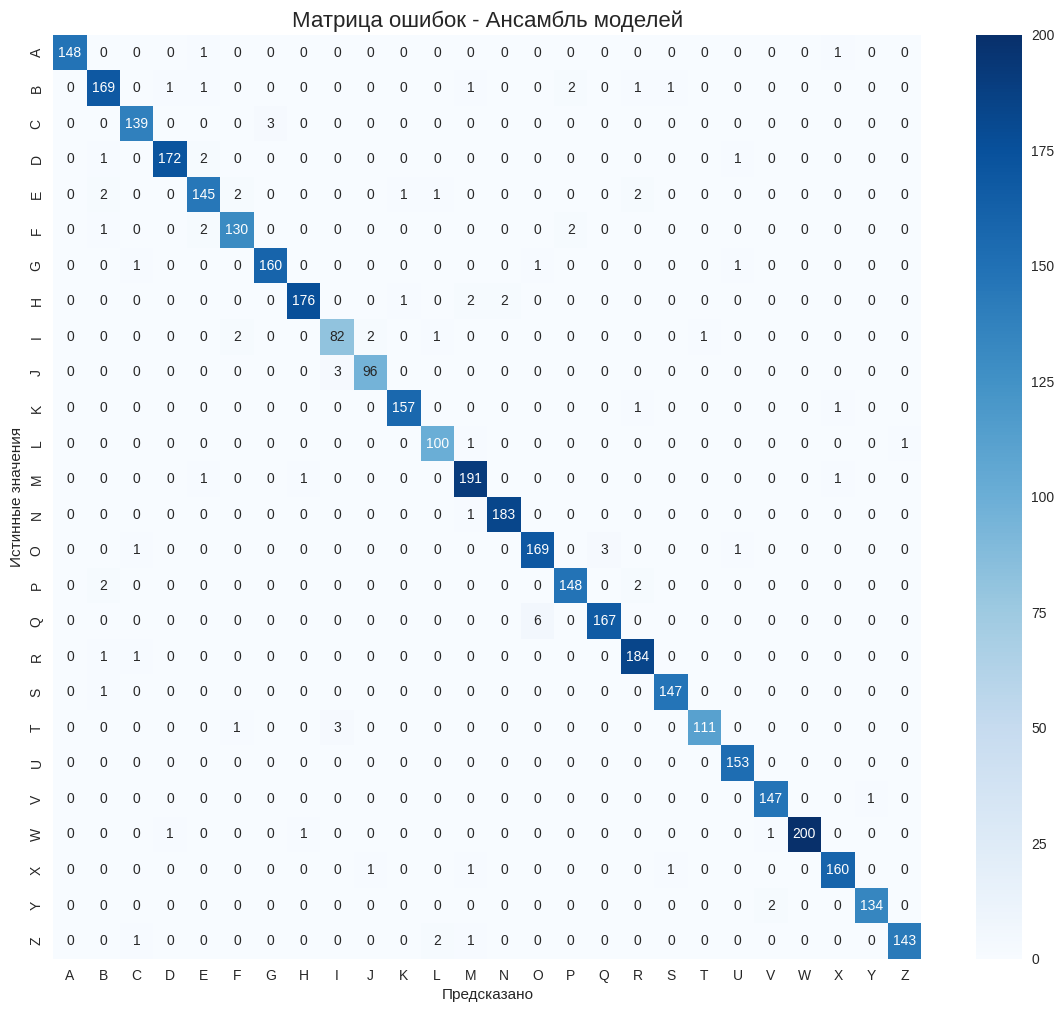

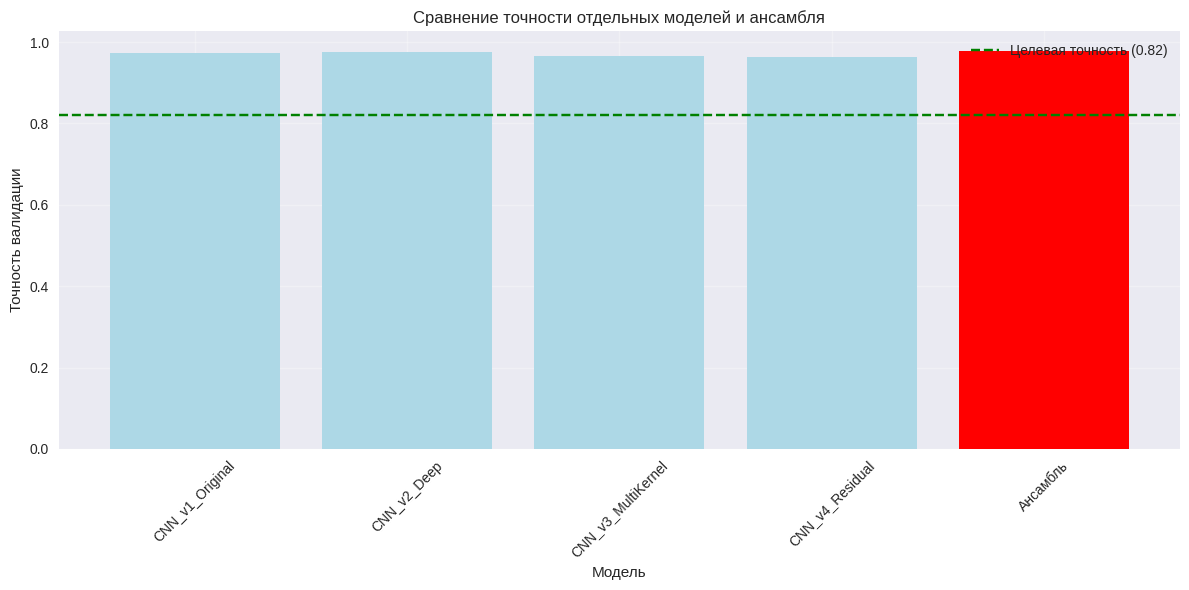

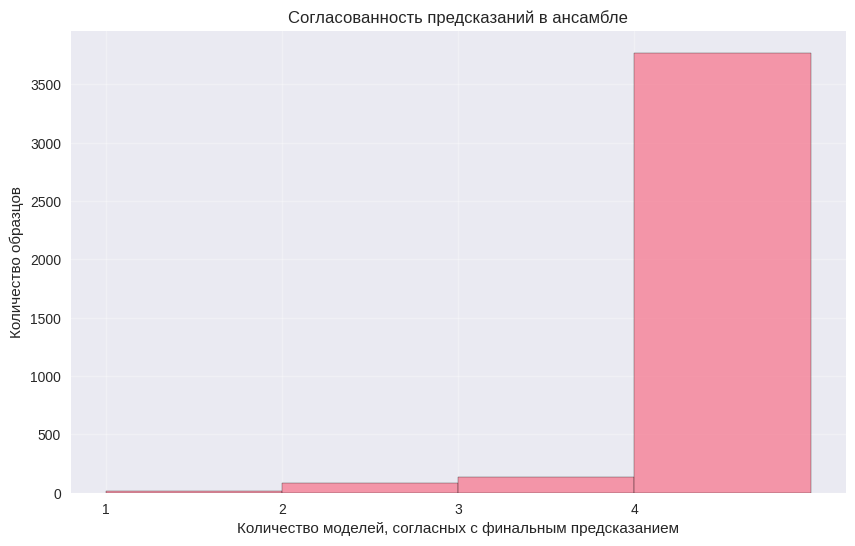


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏:
–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–≥–ª–∞—Å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π: 3.92
–ü–æ–ª–Ω–æ–µ —Å–æ–≥–ª–∞—Å–∏–µ –≤—Å–µ—Ö 4 –º–æ–¥–µ–ª–µ–π: 3770 –æ–±—Ä–∞–∑—Ü–æ–≤ (94.2%)


In [ ]:
# –î–µ—Ç–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –∞–Ω—Å–∞–º–±–ª—è
print("\n–î–µ—Ç–∞–ª—å–Ω—ã–π –æ—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∞–Ω—Å–∞–º–±–ª—è:")
class_names = [chr(65+i) for i in range(26)]
print(classification_report(y_val_true_classes, ensemble_val_classes, target_names=class_names))

# –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –¥–ª—è –∞–Ω—Å–∞–º–±–ª—è
plt.figure(figsize=(14, 12))
cm_ensemble = confusion_matrix(y_val_true_classes, ensemble_val_classes)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ - –ê–Ω—Å–∞–º–±–ª—å –º–æ–¥–µ–ª–µ–π', fontsize=16)
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.show()

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∏ –∞–Ω—Å–∞–º–±–ª—è
plt.figure(figsize=(12, 6))
model_scores = individual_accuracies + [ensemble_accuracy]
model_labels = model_names + ['–ê–Ω—Å–∞–º–±–ª—å']
colors = ['lightblue'] * len(model_names) + ['red']

plt.bar(model_labels, model_scores, color=colors)
plt.xlabel('–ú–æ–¥–µ–ª—å')
plt.ylabel('–¢–æ—á–Ω–æ—Å—Ç—å –≤–∞–ª–∏–¥–∞—Ü–∏–∏')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ—á–Ω–æ—Å—Ç–∏ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∏ –∞–Ω—Å–∞–º–±–ª—è')
plt.xticks(rotation=45)
plt.axhline(y=0.82, color='green', linestyle='--', label='–¶–µ–ª–µ–≤–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å (0.82)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# –ê–Ω–∞–ª–∏–∑ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è
agreement_scores = []
for i in range(len(X_val)):
    individual_preds = [np.argmax(pred[i]) for pred in individual_val_preds]
    # –°—á–∏—Ç–∞–µ–º, —Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π —Å–æ–≥–ª–∞—Å–Ω—ã —Å —Ñ–∏–Ω–∞–ª—å–Ω—ã–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º
    final_pred = ensemble_val_classes[i]
    agreement = sum(1 for pred in individual_preds if pred == final_pred)
    agreement_scores.append(agreement)

plt.figure(figsize=(10, 6))
plt.hist(agreement_scores, bins=range(1, len(ensemble_models)+2), alpha=0.7, edgecolor='black')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π, —Å–æ–≥–ª–∞—Å–Ω—ã—Ö —Å —Ñ–∏–Ω–∞–ª—å–Ω—ã–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤')
plt.title('–°–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –≤ –∞–Ω—Å–∞–º–±–ª–µ')
plt.xticks(range(1, len(ensemble_models)+1))
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏:")
print(f"–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–≥–ª–∞—Å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π: {np.mean(agreement_scores):.2f}")
print(f"–ü–æ–ª–Ω–æ–µ —Å–æ–≥–ª–∞—Å–∏–µ –≤—Å–µ—Ö {len(ensemble_models)} –º–æ–¥–µ–ª–µ–π: {sum(1 for score in agreement_scores if score == len(ensemble_models))} –æ–±—Ä–∞–∑—Ü–æ–≤ ({sum(1 for score in agreement_scores if score == len(ensemble_models))/len(agreement_scores)*100:.1f}%)")


–ì–ï–ù–ï–†–ê–¶–ò–Ø –§–ò–ù–ê–õ–¨–ù–´–• –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ô –ê–ù–°–ê–ú–ë–õ–Ø
–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö...
–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç –º–æ–¥–µ–ª–∏ 1/4...
–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç –º–æ–¥–µ–ª–∏ 2/4...
–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç –º–æ–¥–µ–ª–∏ 3/4...
–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç –º–æ–¥–µ–ª–∏ 4/4...
–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è: (50000, 26)
–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤: (50000,)
–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –∞–Ω—Å–∞–º–±–ª—è:
–°—Ä–µ–¥–Ω—è—è —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å: 0.9696
–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å: 0.1682
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å: 1.0000
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—

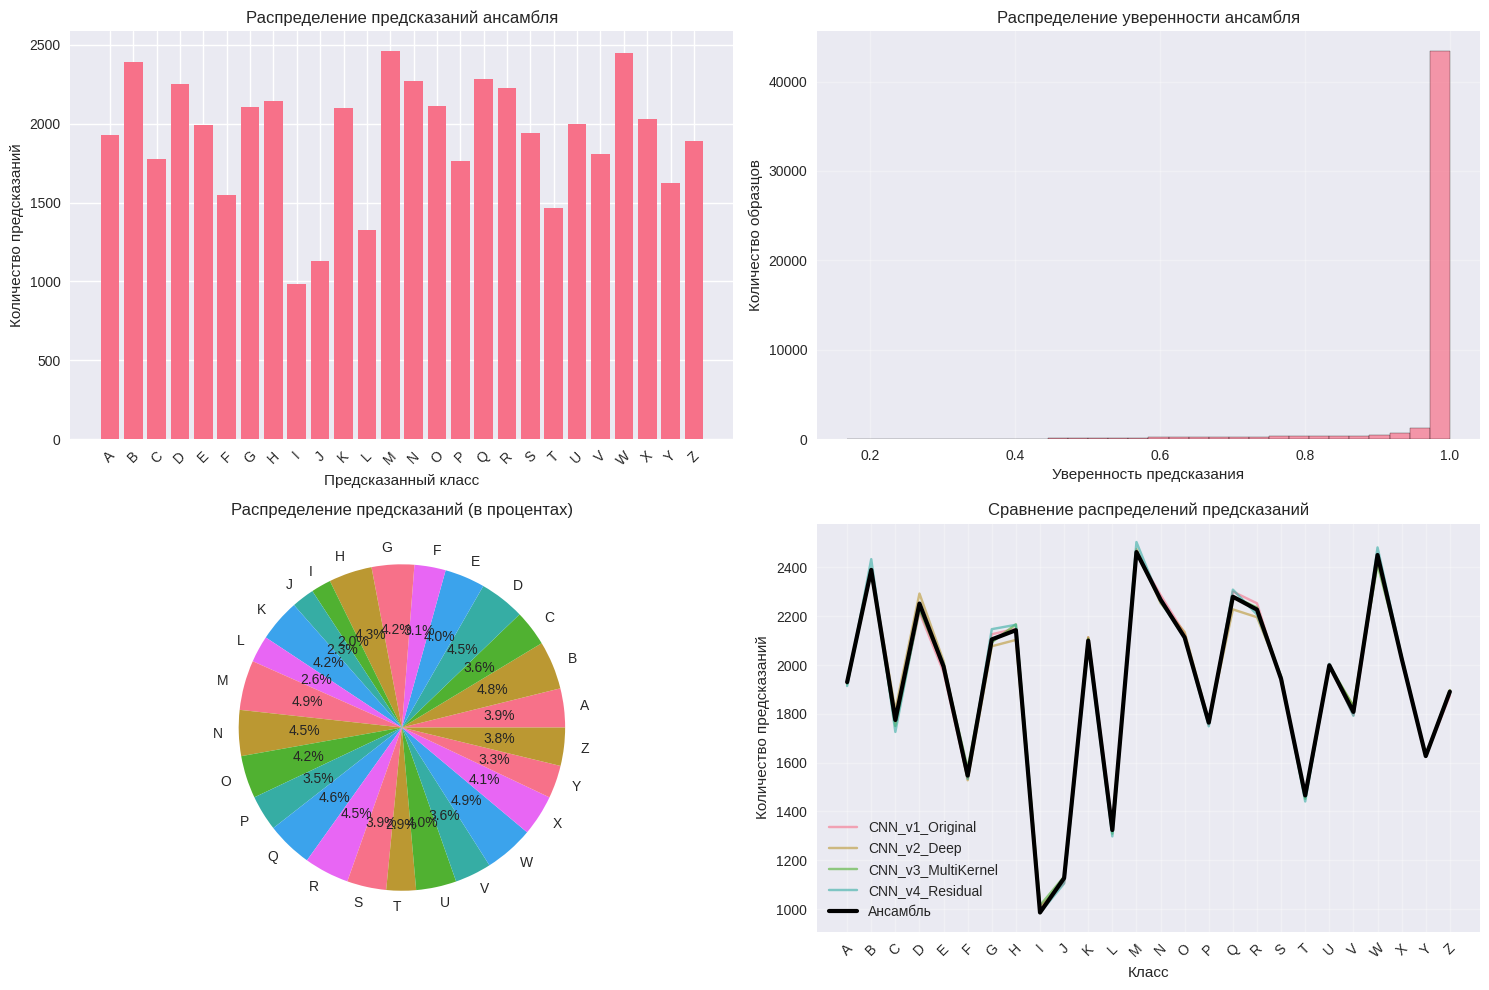


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è:
–ö–ª–∞—Å—Å A: 1930 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (3.9%)
–ö–ª–∞—Å—Å B: 2390 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.8%)
–ö–ª–∞—Å—Å C: 1775 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (3.5%)
–ö–ª–∞—Å—Å D: 2252 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.5%)
–ö–ª–∞—Å—Å E: 1994 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.0%)
–ö–ª–∞—Å—Å F: 1547 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (3.1%)
–ö–ª–∞—Å—Å G: 2105 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.2%)
–ö–ª–∞—Å—Å H: 2143 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.3%)
–ö–ª–∞—Å—Å I: 986 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (2.0%)
–ö–ª–∞—Å—Å J: 1127 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (2.3%)
–ö–ª–∞—Å—Å K: 2100 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.2%)
–ö–ª–∞—Å—Å L: 1324 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (2.6%)
–ö–ª–∞—Å—Å M: 2463 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.9%)
–ö–ª–∞—Å—Å N: 2268 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.5%)
–ö–ª–∞—Å—Å O: 2113 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.2%)
–ö–ª–∞—Å—Å P: 1764 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (3.5%)
–ö–ª–∞—Å—Å Q: 2280 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.6%)
–ö–ª–∞—Å—Å R: 2227 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (4.5%)
–ö–ª–∞—Å—Å S

In [ ]:
# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Ñ–∏–Ω–∞–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("\n" + "="*70)
print("–ì–ï–ù–ï–†–ê–¶–ò–Ø –§–ò–ù–ê–õ–¨–ù–´–• –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ô –ê–ù–°–ê–ú–ë–õ–Ø")
print("="*70)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("–ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö...")
ensemble_test_pred, individual_test_preds = ensemble_predict(ensemble_models, X_test)
ensemble_test_classes = np.argmax(ensemble_test_pred, axis=1)

print(f"–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è: {ensemble_test_pred.shape}")
print(f"–†–∞–∑–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤: {ensemble_test_classes.shape}")
print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã: {np.unique(ensemble_test_classes)}")

# –ê–Ω–∞–ª–∏–∑ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è
ensemble_confidence = np.max(ensemble_test_pred, axis=1)
print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –∞–Ω—Å–∞–º–±–ª—è:")
print(f"–°—Ä–µ–¥–Ω—è—è —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å: {np.mean(ensemble_confidence):.4f}")
print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å: {np.min(ensemble_confidence):.4f}")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å: {np.max(ensemble_confidence):.4f}")
print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å—é > 0.9: {sum(1 for conf in ensemble_confidence if conf > 0.9)} ({sum(1 for conf in ensemble_confidence if conf > 0.9)/len(ensemble_confidence)*100:.1f}%)")

# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è
ensemble_pred_counts = np.bincount(ensemble_test_classes, minlength=26)

plt.figure(figsize=(15, 10))

# –ì—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
plt.subplot(2, 2, 1)
plt.bar(range(26), ensemble_pred_counts)
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è')
plt.xticks(range(26), class_names)
plt.xticks(rotation=45)

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏
plt.subplot(2, 2, 2)
plt.hist(ensemble_confidence, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('–£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –∞–Ω—Å–∞–º–±–ª—è')
plt.grid(True, alpha=0.3)

# –ö—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
plt.subplot(2, 2, 3)
plt.pie(ensemble_pred_counts, labels=class_names, autopct='%1.1f%%')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (–≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö)')

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –æ—Ç–¥–µ–ª—å–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏
plt.subplot(2, 2, 4)
for i, pred in enumerate(individual_test_preds):
    individual_classes = np.argmax(pred, axis=1)
    individual_counts = np.bincount(individual_classes, minlength=26)
    plt.plot(range(26), individual_counts, alpha=0.6, label=f'{model_names[i]}')

plt.plot(range(26), ensemble_pred_counts, 'k-', linewidth=3, label='–ê–Ω—Å–∞–º–±–ª—å')
plt.xlabel('–ö–ª–∞—Å—Å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π')
plt.legend()
plt.xticks(range(26), class_names)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∞–Ω—Å–∞–º–±–ª—è:")
for i in range(26):
    print(f"–ö–ª–∞—Å—Å {chr(65+i)}: {ensemble_pred_counts[i]} –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π ({ensemble_pred_counts[i]/len(ensemble_test_classes)*100:.1f}%)")

In [ ]:
# –°–æ–∑–¥–∞–Ω–∏–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏ —Å –∞–Ω—Å–∞–º–±–ª–µ–º
ensemble_submission = pd.DataFrame({
    'Id': range(len(ensemble_test_classes)),
    'Category': ensemble_test_classes
})


# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∞–π–ª–∞ –¥–ª—è –æ—Ç–ø—Ä–∞–≤–∫–∏
ensemble_submission_filename = '/kaggle/working/ensemble_submission.csv'
ensemble_submission.to_csv(ensemble_submission_filename, index=False)
